# Import Modules

In [2]:
import pandas as pd
import math
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
from clean_telecom_dataframe import Telecom
from plot_telecom_dataframe import TelecomPlotter

# Read CSV Data

In [3]:
telecom_clean_df = pd.read_csv("../data/telecom_cleaned_data.csv")

In [4]:
#initialize the  imported cleaner and plotter
telecom_plot = TelecomPlotter()
telecom_cleaner = Telecom()

In [5]:
telecom_clean_df.shape

(138071, 55)

In [6]:
telecom_clean_df

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,0,-9223372036854775808,2019-04-04 12:01:00,770,2019-04-25 14:35:00,662,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1,-9223372036854775808,2019-04-09 13:04:00,235,2019-04-25 08:15:00,606,208201909211140,33681854413,35794009006359,L77566A,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,2,-9223372036854775808,2019-04-09 17:42:00,1,2019-04-25 11:58:00,652,208200314458056,33760627129,35281510359387,D42335A,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,4,-9223372036854775808,2019-04-12 20:10:00,565,2019-04-25 10:40:00,954,208201401415120,33699795932,35407009745539,D88865A,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0
4,6,-9223372036854775808,2019-04-13 08:41:00,612,2019-04-25 08:16:00,168,208201448341047,33665368271,86762704322800,9.16456701058919E+015,...,47925246.0,70562047.0,1624991.0,4906872.0,2090979.0,9120760.0,31212766.0,58881157.0,814303325.0,118487293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138066,149994,-9223372036854775808,2019-04-29 07:28:00,83,2019-04-30 15:01:00,268,208200313074099,33645655643,35155409288696,T88383B,...,59377936.0,862796008.0,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0,922173944.0
138067,149996,7277825670196679680,2019-04-29 07:28:00,451,2019-04-30 06:02:00,214,208202201200072,33650688697,35483109451938,D20434A,...,57628851.0,574175259.0,3517065.0,12784914.0,690876.0,27955095.0,37561864.0,535806880.0,16751926.0,631804110.0
138068,149997,7349883264234609664,2019-04-29 07:28:00,483,2019-04-30 10:41:00,187,208201908153249,33663449963,35660508296467,D10223C,...,39135081.0,666648844.0,2352181.0,4415361.0,2121718.0,22165518.0,40643294.0,631628095.0,714638145.0,705783925.0
138069,149998,-9223372036854775808,2019-04-29 07:28:00,283,2019-04-30 10:46:00,810,208201711161187,33621890103,35721209870907,T51102A,...,34912224.0,592786405.0,1260239.0,6585469.0,2058277.0,24516413.0,15029702.0,566933800.0,132415585.0,627698629.0


# Univariate Analysis

In [15]:
# combine upload and download datafor each app and total data to make it easy to make analysis easier
telecom_clean_df['Social Media Data Volume (Bytes)'] = telecom_clean_df['Social Media UL (Bytes)'] + telecom_clean_df['Social Media DL (Bytes)']
telecom_clean_df['Google Data Volume (Bytes)'] = telecom_clean_df['Google UL (Bytes)'] + telecom_clean_df['Google DL (Bytes)']
telecom_clean_df['Email Data Volume (Bytes)'] = telecom_clean_df['Email UL (Bytes)'] + telecom_clean_df['Email DL (Bytes)']
telecom_clean_df['Youtube Data Volume (Bytes)'] = telecom_clean_df['Youtube UL (Bytes)'] + telecom_clean_df['Youtube DL (Bytes)']
telecom_clean_df['Netflix Data Volume (Bytes)'] = telecom_clean_df['Netflix UL (Bytes)'] + telecom_clean_df['Netflix DL (Bytes)']
telecom_clean_df['Gaming Data Volume (Bytes)'] = telecom_clean_df['Gaming UL (Bytes)'] + telecom_clean_df['Gaming DL (Bytes)']
telecom_clean_df['Other Data Volume (Bytes)'] = telecom_clean_df['Other UL (Bytes)'] + telecom_clean_df['Other DL (Bytes)']
telecom_clean_df['Total Data Volume (Bytes)'] = telecom_clean_df['Total UL (Bytes)'] + telecom_clean_df['Total DL (Bytes)']

In [16]:
telecom_clean_df[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.380710e+05
mean,1.827957e+06
std,1.035470e+06
min,1.563000e+03
25%,9.312060e+05
50%,1.826757e+06
75%,2.726343e+06
max,3.650240e+06


In [17]:
telecom_clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138071 entries, 0 to 138070
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        138071 non-null  int64  
 1   Bearer Id                         138071 non-null  int64  
 2   Start                             138071 non-null  object 
 3   Start ms                          138071 non-null  int64  
 4   End                               138071 non-null  object 
 5   End ms                            138071 non-null  int64  
 6   IMSI                              138071 non-null  int64  
 7   MSISDN/Number                     138071 non-null  int64  
 8   IMEI                              138071 non-null  int64  
 9   Last Location Name                138071 non-null  object 
 10  Avg RTT DL (ms)                   138071 non-null  float64
 11  Avg RTT UL (ms)                   138071 non-null  f

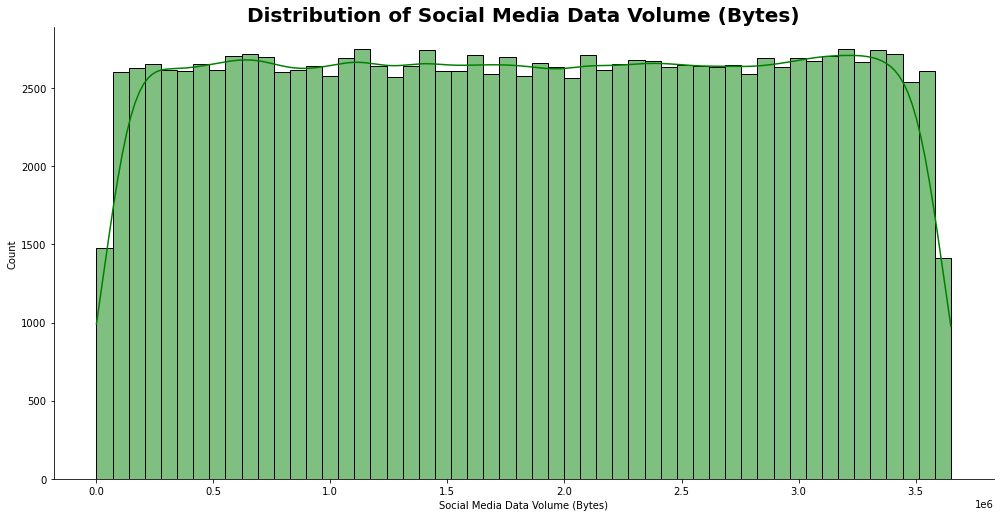

In [18]:
telecom_plot.plot_hist(telecom_clean_df, 'Social Media Data Volume (Bytes)', 'green')

In [19]:
telecom_clean_df[['Google Data Volume (Bytes)']].describe()

,Google Data Volume (Bytes)
count,1.380710e+05
mean,7.807930e+06
std,3.517752e+06
min,4.033000e+04
25%,4.940168e+06
50%,7.816637e+06
75%,1.068531e+07
max,1.552878e+07


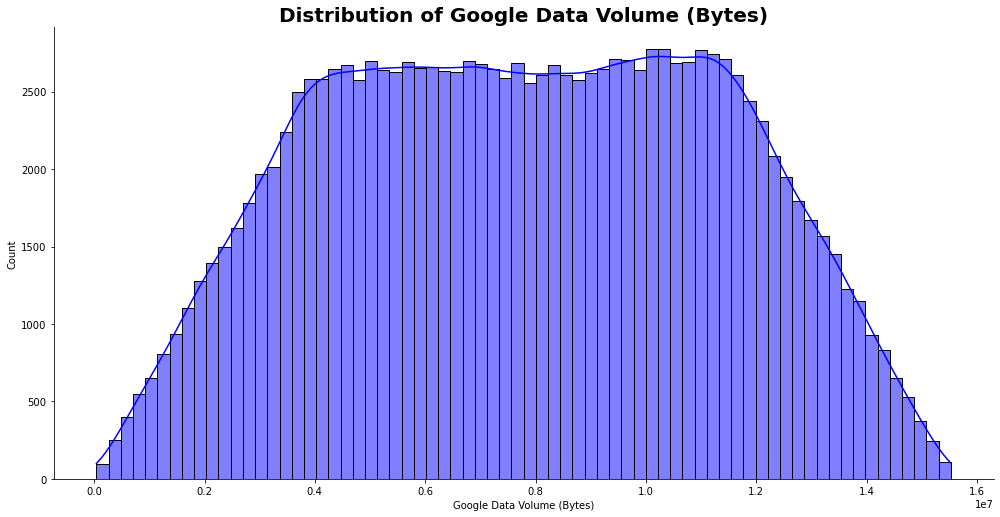

In [20]:
telecom_plot.plot_hist(telecom_clean_df, 'Google Data Volume (Bytes)', 'blue')

In [21]:
telecom_clean_df[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.380710e+05
mean,2.258390e+06
std,1.070802e+06
min,8.359000e+03
25%,1.358567e+06
50%,2.262860e+06
75%,3.158602e+06
max,4.518036e+06


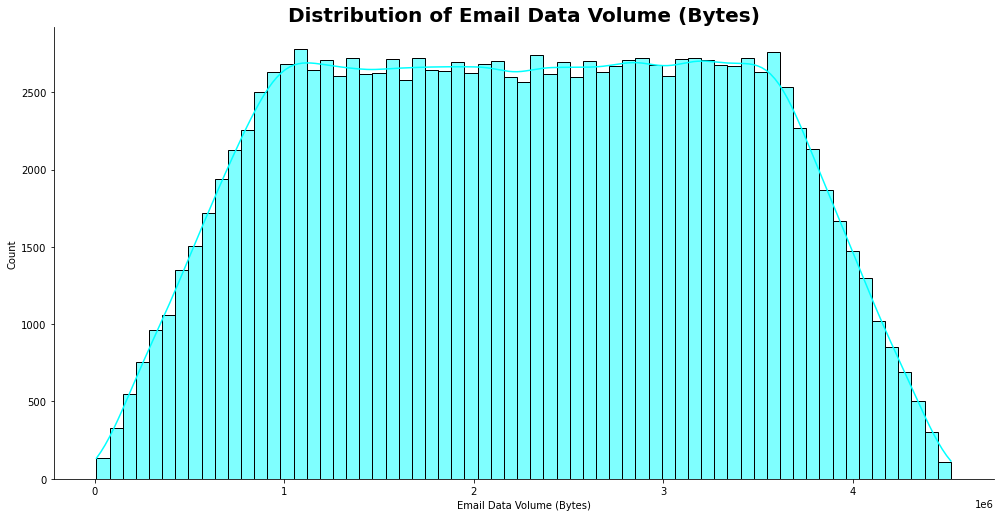

In [22]:
telecom_plot.plot_hist(telecom_clean_df, 'Email Data Volume (Bytes)', 'cyan')

In [23]:
telecom_clean_df[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.380710e+05
mean,2.264140e+07
std,9.247286e+06
min,1.296550e+05
25%,1.599099e+07
50%,2.266795e+07
75%,2.929900e+07
max,4.519008e+07


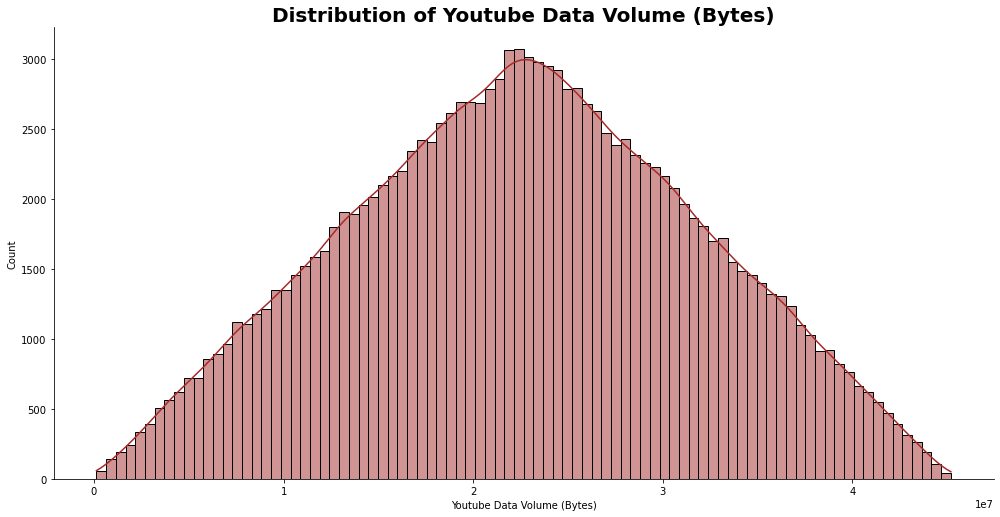

In [24]:
telecom_plot.plot_hist(telecom_clean_df, 'Youtube Data Volume (Bytes)', 'brown')

In [25]:
telecom_clean_df[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,1.380710e+05
mean,2.262875e+07
std,9.252857e+06
min,9.843200e+04
25%,1.598462e+07
50%,2.263554e+07
75%,2.927244e+07
max,4.519815e+07


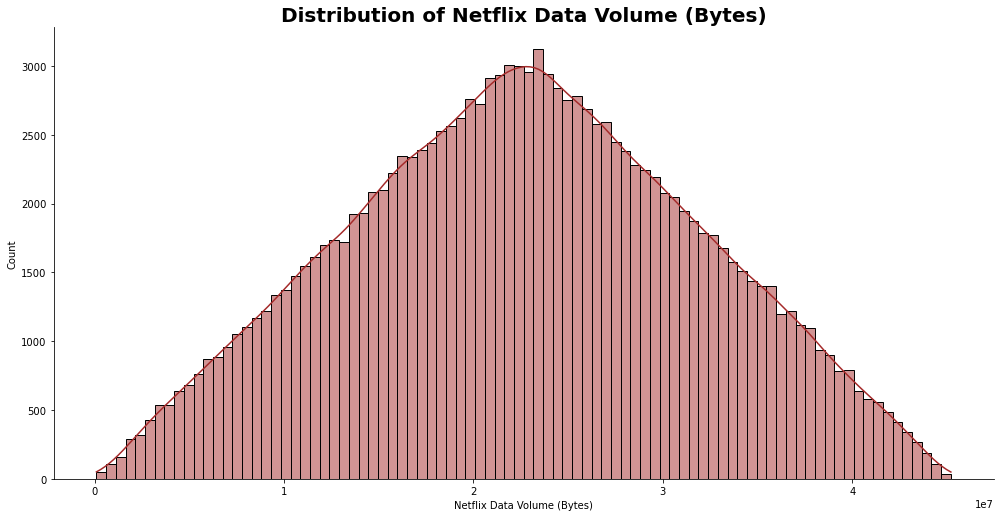

In [26]:
telecom_plot.plot_hist(telecom_clean_df, 'Netflix Data Volume (Bytes)', 'brown')

In [27]:
telecom_clean_df[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.380710e+05
mean,4.300400e+08
std,2.441311e+08
min,3.063580e+05
25%,2.183016e+08
50%,4.311000e+08
75%,6.413710e+08
max,8.592028e+08


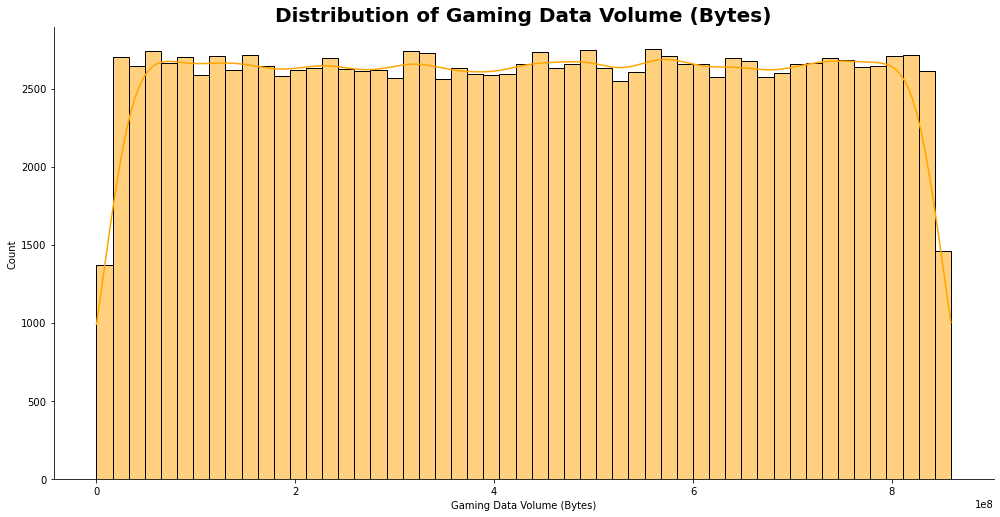

In [28]:
telecom_plot.plot_hist(telecom_clean_df, 'Gaming Data Volume (Bytes)', 'orange')

In [29]:
telecom_clean_df[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.380710e+05
mean,4.954683e+08
std,2.444744e+08
min,2.895611e+07
25%,2.841008e+08
50%,4.962974e+08
75%,7.063820e+08
max,9.559848e+08


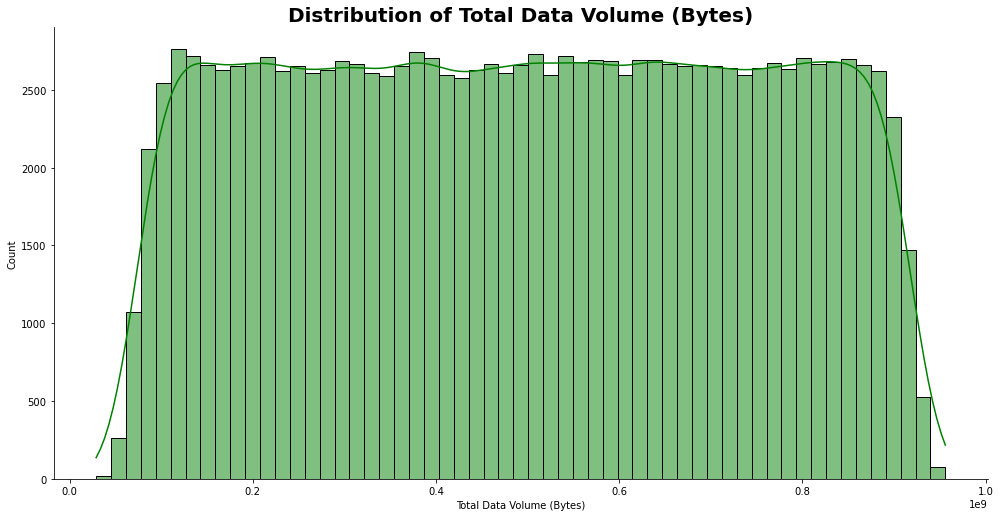

In [22]:
telecom_plot.plot_hist(telecom_clean_df, 'Total Data Volume (Bytes)', 'green')

# Bivariate Analysis

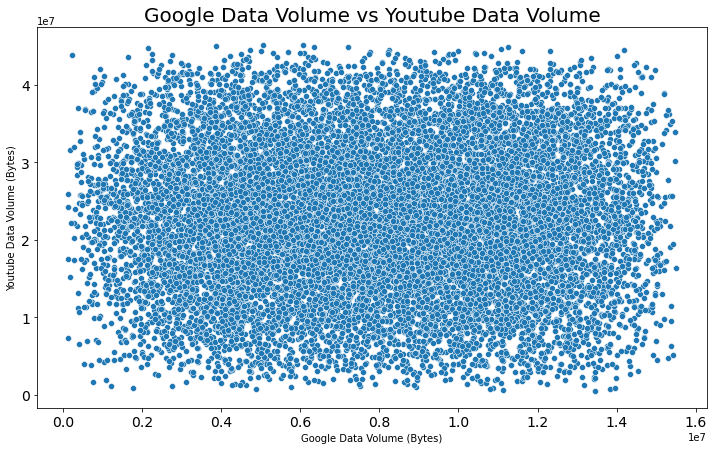

In [30]:
from turtle import color
telecom_plot.plot_scatter(telecom_clean_df.head(15000), x_col="Google Data Volume (Bytes)", y_col="Youtube Data Volume (Bytes)", title="Google Data Volume vs Youtube Data Volume")

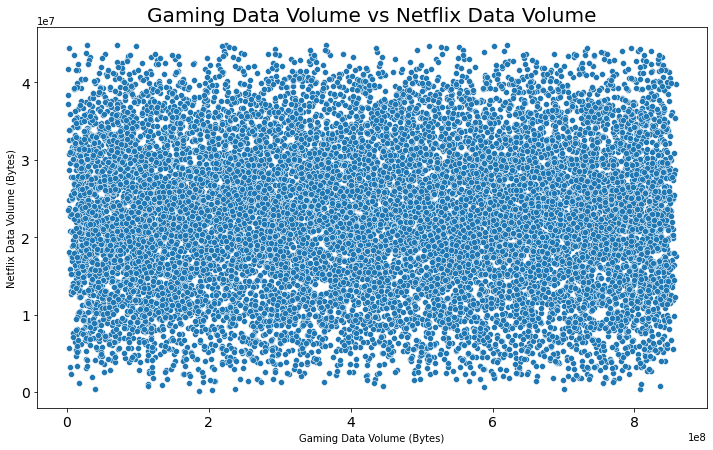

In [31]:
telecom_plot.plot_scatter(telecom_clean_df.head(15000), x_col="Gaming Data Volume (Bytes)", y_col="Netflix Data Volume (Bytes)", title="Gaming Data Volume vs Netflix Data Volume")

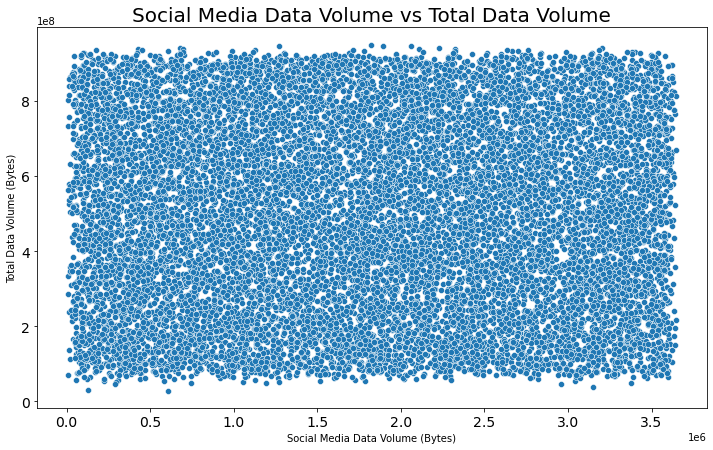

In [32]:
telecom_plot.plot_scatter(telecom_clean_df.head(15000), x_col="Social Media Data Volume (Bytes)", y_col="Total Data Volume (Bytes)", title="Social Media Data Volume vs Total Data Volume")

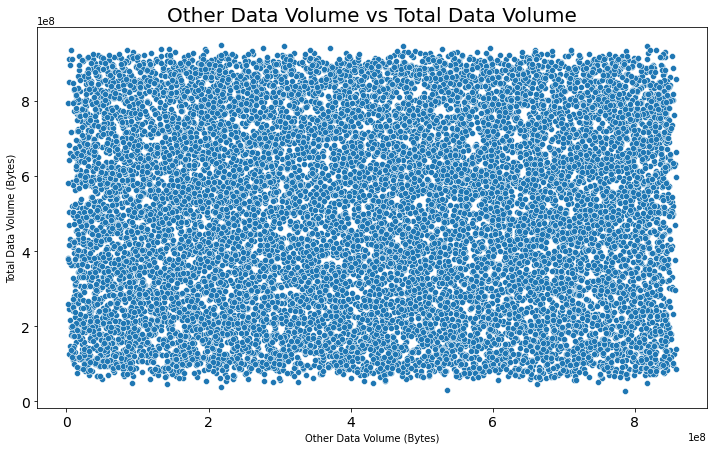

In [33]:
telecom_plot.plot_scatter(telecom_clean_df.head(15000), x_col="Other Data Volume (Bytes)", y_col="Total Data Volume (Bytes)", title="Other Data Volume vs Total Data Volume")

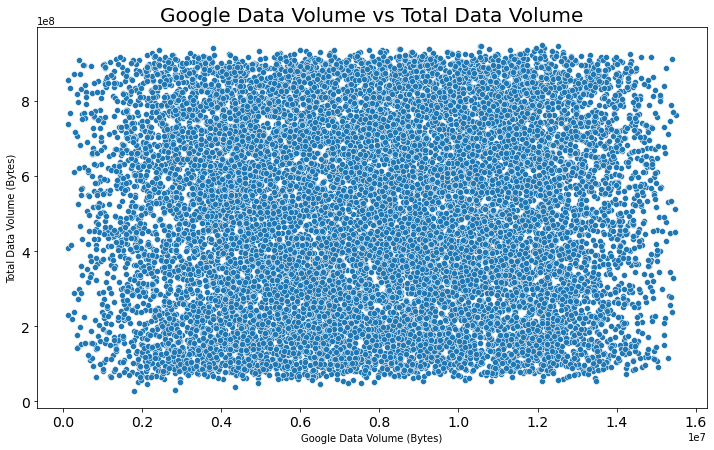

In [34]:
telecom_plot.plot_scatter(telecom_clean_df.head(15000), x_col="Google Data Volume (Bytes)", y_col="Total Data Volume (Bytes)", title="Google Data Volume vs Total Data Volume")

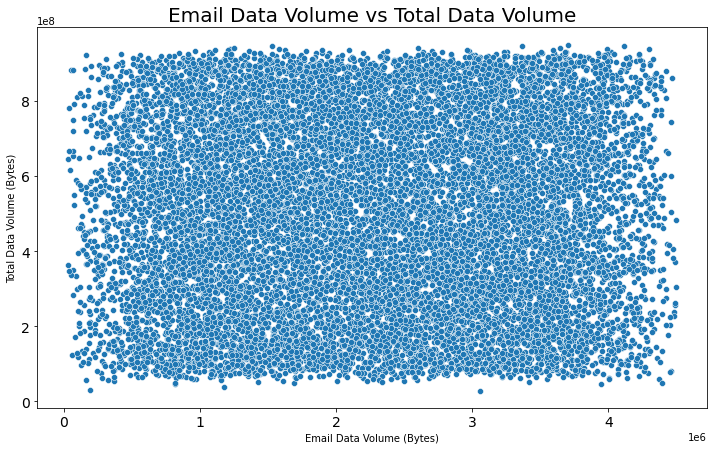

In [35]:
telecom_plot.plot_scatter(telecom_clean_df.head(15000), x_col="Email Data Volume (Bytes)", y_col="Total Data Volume (Bytes)", title="Email Data Volume vs Total Data Volume")

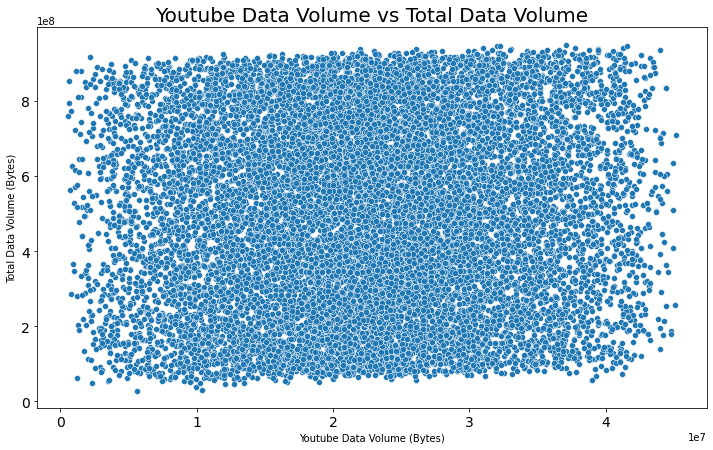

In [36]:
telecom_plot.plot_scatter(telecom_clean_df.head(15000), x_col="Youtube Data Volume (Bytes)", y_col="Total Data Volume (Bytes)", title="Youtube Data Volume vs Total Data Volume")

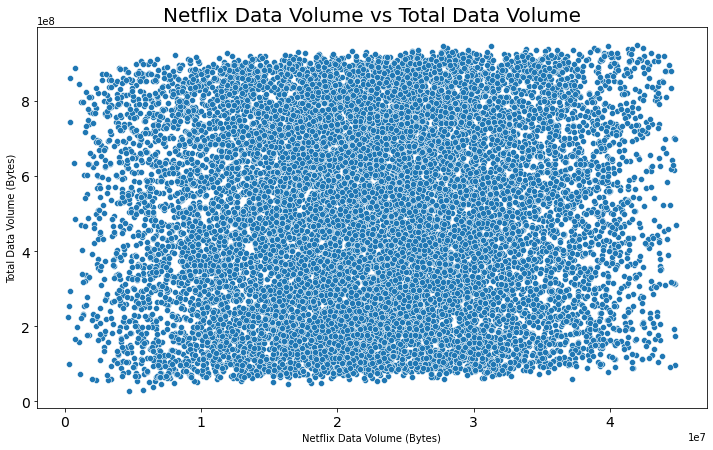

In [37]:
telecom_plot.plot_scatter(telecom_clean_df.head(15000), x_col="Netflix Data Volume (Bytes)", y_col="Total Data Volume (Bytes)", title="Netflix Data Volume vs Total Data Volume")

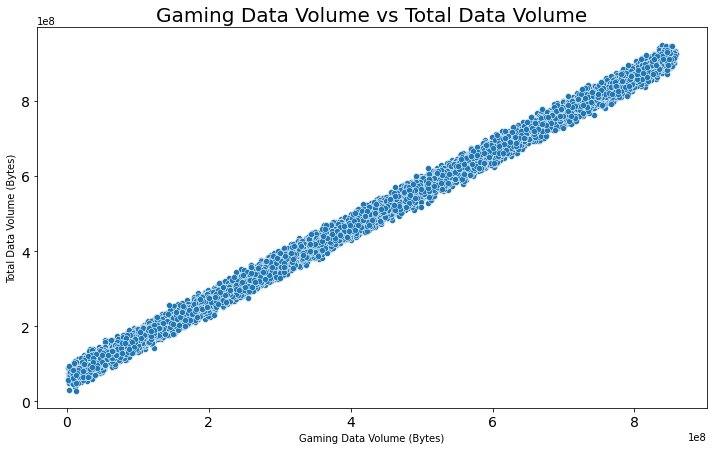

In [38]:
telecom_plot.plot_scatter(telecom_clean_df.head(15000), x_col="Gaming Data Volume (Bytes)", y_col="Total Data Volume (Bytes)", title="Gaming Data Volume vs Total Data Volume")

# User Application Correlation Analysis


In [39]:
application_corelated_df = telecom_clean_df[['Google Data Volume (Bytes)','Social Media Data Volume (Bytes)', 'Email Data Volume (Bytes)','Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)','Other Data Volume (Bytes)']].corr()
application_corelated_df

,Google Data Volume (Bytes),Social Media Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Google Data Volume (Bytes),1.000000,-0.002494,0.000484,0.001871,-0.001316,-0.001173,-0.002304
Social Media Data Volume (Bytes),-0.002494,1.000000,0.003063,0.000680,0.000759,0.001112,0.005395
Email Data Volume (Bytes),0.000484,0.003063,1.000000,-0.005626,0.001441,0.000803,-0.000846
Youtube Data Volume (Bytes),0.001871,0.000680,-0.005626,1.000000,0.003873,-0.003240,0.002797
Netflix Data Volume (Bytes),-0.001316,0.000759,0.001441,0.003873,1.000000,-0.004676,-0.008159
Gaming Data Volume (Bytes),-0.001173,0.001112,0.000803,-0.003240,-0.004676,1.000000,-0.002593
Other Data Volume (Bytes),-0.002304,0.005395,-0.000846,0.002797,-0.008159,-0.002593,1.000000


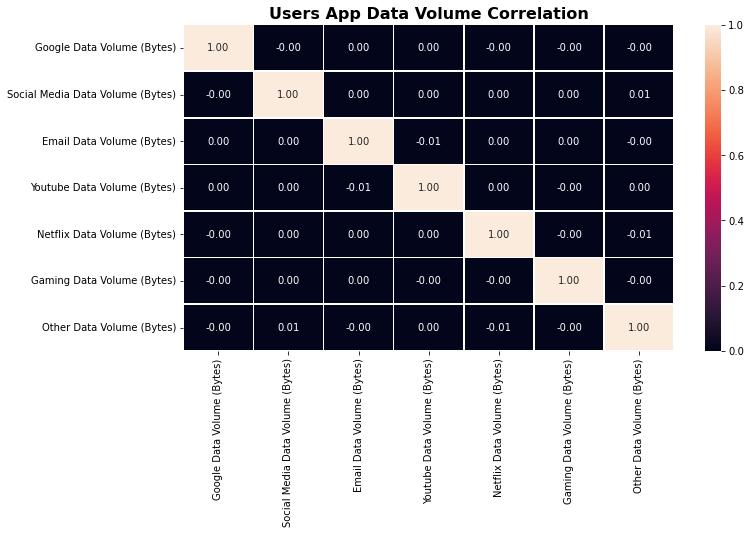

In [40]:
telecom_plot.plot_heatmap(application_corelated_df, "Users App Data Volume Correlation")


## Top 10 Handset

In [41]:
# identifying the top 10 handsets used by the customers
telecom_clean_df['Handset Type'].value_counts().head(10)


Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5151
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Samsung Galaxy A5 Sm-A520F       3673
Name: Handset Type, dtype: int64

## Top 3 MAnufacturers

In [42]:
#identify the top 3 handset manufacturers
top_three_handset_manufacturers = telecom_clean_df['Handset Manufacturer'].value_counts().head(3)
top_three_handset_manufacturers

Apple      59072
Samsung    39902
Huawei     33755
Name: Handset Manufacturer, dtype: int64

<AxesSubplot:>

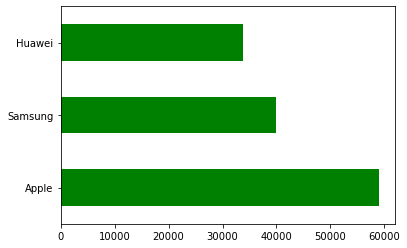

In [43]:
# Plot  top 3 manufacturers
top_three_handset_manufacturers.plot(kind='barh',color='green')

In [44]:
# Get top handsets of top handset manufacturers
top_handset_manufacturers = telecom_clean_df[telecom_clean_df["Handset Manufacturer"].isin(top_three_handset_manufacturers.index.tolist())]
top_handsets = top_handset_manufacturers['Handset Type'].groupby(telecom_clean_df['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top_handsets

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9369
                      Apple iPhone 6 (A1586)             8967
                      Apple iPhone 7 (A1778)             6240
                      Apple iPhone Se (A1723)            5151
                      Apple iPhone 8 (A1905)             4961
Huawei                Huawei B528S-23A                  19373
                      Huawei E5180                       2062
                      Huawei P20 Lite Huawei Nova 3E     2000
                      Huawei P20                         1471
                      Huawei Y6 2018                      984
Samsung               Samsung Galaxy S8 (Sm-G950F)       4404
                      Samsung Galaxy A5 Sm-A520F         3673
                      Samsung Galaxy J5 (Sm-J530)        3664
                      Samsung Galaxy J3 (Sm-J330)        3431
                      Samsung Galaxy S7 (Sm-G930X)       3106
Name: Handset Typ

<AxesSubplot:ylabel='Handset Manufacturer,None'>

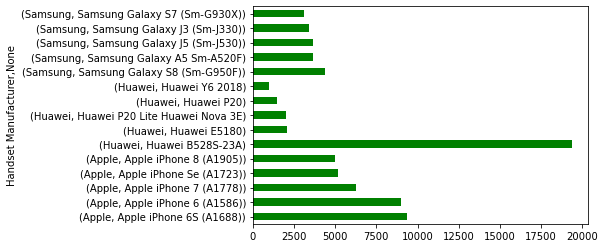

In [45]:
#Plot top 5 handsets per top 3 handset manufacturer
top_handsets.plot(kind='barh',color='green')

## xDR Session Analysis

In [46]:
# group by MSISDN/ Number and get from high to low sorted number of xDR sessions 
number_of_xdr = telecom_clean_df.groupby('MSISDN/Number')['MSISDN/Number'].agg('count').reset_index(name='Bearer Id').sort_values(by='Bearer Id',
        ascending=False)

number_of_xdr.rename(columns={number_of_xdr.columns[1]: 'number of xDR sessions'}, inplace=True)
number_of_xdr

,MSISDN/Number,number of xDR sessions
12555,33626320676,18
12236,33625779332,17
5959,33614892860,17
34383,33659725664,16
70947,33675877202,15
...,...,...
38055,33660654764,1
38054,33660654733,1
38053,33660654706,1
38052,33660654577,1


In [47]:
# Calcualte the total Duration of Sessions per MSISDN/ Number with sorting from high to low 
sum_duration_of_sessions = telecom_clean_df.groupby('MSISDN/Number').agg({'Dur (ms)': 'sum'}).sort_values(by='Dur (ms)',ascending=False)

sum_duration_of_sessions.rename(columns={sum_duration_of_sessions.columns[0]: 'duration of xDR sessions (total)'}, inplace=True)
sum_duration_of_sessions['duration of xDR sessions (total)'] = sum_duration_of_sessions['duration of xDR sessions (total)'].astype("int64")
sum_duration_of_sessions

,duration of xDR sessions (total)
MSISDN/Number,
33625779332,18553763486
33614892860,9966905758
33760536639,9279442000
33626320676,8791936680
33667163239,8744922020
...,...
33650431620,7267018
33698390293,7258080
33659328207,7189000


In [48]:
# Calcualte the Avarage Duration of Sessions per MSISDN/ Number with sorting from high to low 
avg_duration_of_sessions = telecom_clean_df.groupby('MSISDN/Number').agg({'Dur (ms)': 'mean'}).sort_values(by='Dur (ms)',ascending=False)

avg_duration_of_sessions.rename(columns={avg_duration_of_sessions.columns[0]: 'duration of xDR sessions (AVG)'}, inplace=True)
avg_duration_of_sessions

,duration of xDR sessions (AVG)
MSISDN/Number,
33669260221,1.573421e+09
33661715300,1.480875e+09
33607498825,1.474663e+09
33762601828,1.375613e+09
33760627129,1.361763e+09
...,...
33650431620,7.267018e+06
33698390293,7.258080e+06
33659328207,7.189000e+06
